In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [6]:
def clusterize(a, raw_data, graph = False):
    # Clusterizamos
    
    data_tickers = pd.DataFrame(raw_data['Name'])
    raw_data = raw_data.drop(columns = ['Name'])
    
    try:
        raw_data = raw_data.drop(columns = ['Clusters'])
    except KeyError:
        pass
    
    wcss = []

    for i in range(1, a):
        kmeans = KMeans(n_clusters = i, max_iter = 300)
        kmeans.fit(raw_data)
        wcss.append(kmeans.inertia_)

    clustering = KMeans(n_clusters = a, max_iter = 300)
    clustering.fit(raw_data)

    raw_data['Clusters'] = clustering.labels_
    raw_data.insert(loc = 0, column = 'Name', value = data_tickers)
    
    if graph:
        # Codo de Jambú
        plt.plot(range(1,a), wcss)
        plt.xlabel('Número de Clusters')
        plt.ylabel('WCSS')
        plt.show()

    return raw_data

In [7]:
# Esta función descarga los precios de las acciones en una lista
def price_download(stocks, a, b, c):
    data = yf.download(stocks, start=a, end=b)
    cp = data[c] # Seleccionar tipo de precio
    return cp

In [8]:
tickers = pd.read_csv('tickers.csv')
symbols = tickers['Ticker'].values.tolist()
symbols = [x for x in symbols if str(x) != 'nan']

In [9]:
stocks = symbols
start = '2020-02-11'
end = '2021-02-12'
price = 'Adj Close'

data = price_download(stocks, start, end, price)

data

[*********************100%***********************]  2799 of 2799 completed

655 Failed downloads:
- MDR: No data found, symbol may be delisted
- AHL: No data found for this date range, symbol may be delisted
- MDSO: No data found, symbol may be delisted
- BRS: No data found, symbol may be delisted
- MSCC: No data found for this date range, symbol may be delisted
- VIA: No data found, symbol may be delisted
- ES_OLD: No data found, symbol may be delisted
- NSHI: No data found, symbol may be delisted
- MJN: No data found for this date range, symbol may be delisted
- ECA: No data found, symbol may be delisted
- EXAM: No data found for this date range, symbol may be delisted
- CHKE: No data found for this date range, symbol may be delisted
- DRAD: No data found, symbol may be delisted
- ARO: No data found for this date range, symbol may be delisted
- IMPV: No data found for this date range, symbol may be delisted
- EWRX: No data found for this date range, symbol may be delisted
- NTRI: No 

,A,AA,AAC,AAL,AAMC,AAME,AAN,AAOI,AAON,AAP,...,ZM,ZMH,ZNGA,ZS,ZSAN,ZTS,ZUMZ,ZUO,ZYNE,ZYXI
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-11,84.166428,15.740000,NaN,29.840000,12.53,2.069195,NaN,11.51,54.604237,130.023224,...,88.680000,NaN,6.74,60.919998,1.030,142.801025,32.820000,15.560000,5.030,9.880000
2020-02-12,84.502747,15.760000,NaN,30.469999,12.88,1.969714,NaN,12.46,55.159092,132.198288,...,88.279999,NaN,6.75,60.480000,0.531,141.759964,34.250000,15.820000,4.930,10.320000
2020-02-13,84.542305,15.750000,NaN,30.090000,13.08,2.278104,NaN,12.75,55.842766,132.542770,...,89.860001,NaN,6.92,61.900002,0.581,143.703262,33.849998,15.870000,4.890,10.260000
2020-02-14,84.888496,15.670000,NaN,29.200001,13.18,2.278104,NaN,11.90,56.556160,131.479828,...,90.949997,NaN,6.93,62.110001,0.805,142.939804,32.610001,15.970000,4.490,10.160000
2020-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-08,123.060753,21.799999,NaN,17.770000,22.98,6.466234,19.453030,12.34,80.239845,157.418839,...,410.809998,NaN,11.02,215.869995,1.930,159.580109,47.950001,16.430000,5.740,19.990000
2021-02-09,122.891228,21.760000,NaN,17.440001,25.82,6.496078,20.516090,12.37,80.568901,159.634460,...,430.029999,NaN,11.33,220.000000,1.990,159.390625,47.150002,16.570000,5.955,19.990000
2021-02-10,124.726021,21.559999,NaN,17.410000,25.99,5.670390,19.989529,11.75,79.422195,160.816788,...,431.000000,NaN,11.16,223.089996,1.770,160.178436,46.779999,16.280001,8.760,19.510000


In [10]:
data.dropna(axis = 0, how='all', thresh = 50, inplace = True)
data.dropna(axis = 1, how='any', inplace=True)
data

,A,AA,AAL,AAOI,AAON,AAP,AAPL,AAT,AAWW,ABBV,...,ZIOP,ZM,ZNGA,ZS,ZSAN,ZTS,ZUMZ,ZUO,ZYNE,ZYXI
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-11,84.166428,15.740000,29.840000,11.51,54.604237,130.023224,79.153442,43.938591,27.080000,89.040115,...,3.16,88.680000,6.74,60.919998,1.030,142.801025,32.820000,15.560000,5.030,9.880000
2020-02-12,84.502747,15.760000,30.469999,12.46,55.159092,132.198288,81.033165,44.053066,27.469999,90.700333,...,3.20,88.279999,6.75,60.480000,0.531,141.759964,34.250000,15.820000,4.930,10.320000
2020-02-13,84.542305,15.750000,30.090000,12.75,55.842766,132.542770,80.456116,43.881355,26.430000,88.437233,...,3.19,89.860001,6.92,61.900002,0.581,143.703262,33.849998,15.870000,4.890,10.260000
2020-02-14,84.888496,15.670000,29.200001,11.90,56.556160,131.479828,80.475937,44.520493,27.309999,87.231483,...,3.18,90.949997,6.93,62.110001,0.805,142.939804,32.610001,15.970000,4.490,10.160000
2020-02-18,83.869682,15.980000,28.629999,11.75,55.228455,139.570007,79.002380,43.919521,27.590000,86.823387,...,3.36,96.389999,7.09,63.860001,0.819,142.424271,32.389999,16.150000,4.870,10.180000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-05,122.831398,20.950001,17.190001,11.73,77.417938,156.266296,136.528091,28.376007,53.730000,106.239487,...,5.25,419.589996,10.68,216.779999,1.100,158.842133,46.270000,16.049999,5.080,19.000000
2021-02-08,123.060753,21.799999,17.770000,12.34,80.239845,157.418839,136.677841,28.799530,53.590000,104.392776,...,5.60,410.809998,11.02,215.869995,1.930,159.580109,47.950001,16.430000,5.740,19.990000
2021-02-09,122.891228,21.760000,17.440001,12.37,80.568901,159.634460,135.779358,28.819229,55.759998,102.985771,...,5.58,430.029999,11.33,220.000000,1.990,159.390625,47.150002,16.570000,5.955,19.990000


In [11]:
net_returns = data.pct_change()
net_returns.dropna(inplace=True)
net_returns

,A,AA,AAL,AAOI,AAON,AAP,AAPL,AAT,AAWW,ABBV,...,ZIOP,ZM,ZNGA,ZS,ZSAN,ZTS,ZUMZ,ZUO,ZYNE,ZYXI
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-12,0.003996,0.001271,0.021113,0.082537,0.010161,0.016728,0.023748,0.002605,0.014402,0.018646,...,0.012658,-0.004511,0.001484,-0.007223,-0.484466,-0.007290,0.043571,0.016709,-0.019881,0.044534
2020-02-13,0.000468,-0.000635,-0.012471,0.023274,0.012395,0.002606,-0.007121,-0.003898,-0.037859,-0.024951,...,-0.003125,0.017898,0.025185,0.023479,0.094162,0.013708,-0.011679,0.003161,-0.008114,-0.005814
2020-02-14,0.004095,-0.005079,-0.029578,-0.066667,0.012775,-0.008020,0.000246,0.014565,0.033295,-0.013634,...,-0.003135,0.012130,0.001445,0.003393,0.385542,-0.005313,-0.036632,0.006301,-0.081800,-0.009747
2020-02-18,-0.012002,0.019783,-0.019521,-0.012605,-0.023476,0.061532,-0.018311,-0.013499,0.010253,-0.004678,...,0.056604,0.059813,0.023088,0.028176,0.017391,-0.003607,-0.006746,0.011271,0.084633,0.001969
2020-02-19,0.006605,0.045056,-0.010478,0.028085,0.025117,-0.011918,0.014483,-0.011295,0.075752,0.005662,...,-0.038690,0.078224,0.000000,0.020514,-0.048840,0.002854,-0.012041,-0.004954,-0.012320,0.031434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-05,-0.007173,0.028978,-0.012069,0.029851,0.010017,-0.007572,-0.003098,0.010168,0.012246,0.001843,...,0.190476,0.075927,0.037901,0.014175,0.000000,0.013683,-0.003661,0.022293,0.126386,0.046256
2021-02-08,0.001867,0.040573,0.033741,0.052003,0.036450,0.007376,0.001097,0.014925,-0.002606,-0.017383,...,0.066667,-0.020925,0.031835,-0.004198,0.754545,0.004646,0.036309,0.023676,0.129921,0.052105
2021-02-09,-0.001378,-0.001835,-0.018571,0.002431,0.004101,0.014075,-0.006574,0.000684,0.040493,-0.013478,...,-0.003571,0.046786,0.028131,0.019132,0.031088,-0.001187,-0.016684,0.008521,0.037456,0.000000


In [12]:
rdto = net_returns.mean()
risk = net_returns.std()

datos = pd.DataFrame([rdto, risk])
datos = datos.transpose()
datos.reset_index(inplace = True)
datos.rename(columns={'index': 'Name', 0: 'Rendimiento', 1: 'Riesgo'}, inplace = True)
datos

,Name,Rendimiento,Riesgo
0,A,0.001882,0.023133
1,AA,0.002530,0.051337
2,AAL,-0.000157,0.065906
3,AAOI,0.001614,0.051318
4,AAON,0.001993,0.032923
...,...,...,...
1946,ZTS,0.000853,0.024721
1947,ZUMZ,0.002415,0.043478
1948,ZUO,0.001154,0.041543
1949,ZYNE,0.003245,0.068342


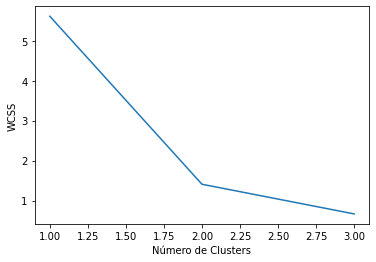

,Name,Rendimiento,Riesgo,Clusters
0,Name,0.001882,0.023133,0
1,Name,0.002530,0.051337,0
2,Name,-0.000157,0.065906,2
3,Name,0.001614,0.051318,0
4,Name,0.001993,0.032923,0
...,...,...,...,...
1946,Name,0.000853,0.024721,0
1947,Name,0.002415,0.043478,0
1948,Name,0.001154,0.041543,0
1949,Name,0.003245,0.068342,2


In [13]:
clusters = clusterize(4, datos, graph = True)
clusters

In [14]:
print("Estructura de los clusters:")
clusters['Clusters'].value_counts()

Estructura de los clusters:


0    1493
2     429
3      28
1       1
Name: Clusters, dtype: int64

In [15]:
cluster_1 = clusters[clusters['Clusters'] == 0]
clusters = clusters[clusters['Clusters'] != 0]
cluster_1

,Name,Rendimiento,Riesgo,Clusters
0,Name,0.001882,0.023133,0
1,Name,0.002530,0.051337,0
3,Name,0.001614,0.051318,0
4,Name,0.001993,0.032923,0
5,Name,0.001103,0.029640,0
...,...,...,...,...
1943,Name,0.002658,0.027664,0
1944,Name,0.006056,0.043729,0
1946,Name,0.000853,0.024721,0
1947,Name,0.002415,0.043478,0


In [16]:
cluster_1 = clusterize(4, cluster_1, graph = False)
cluster_1 = cluster_1['Clusters'] + 4
cluster_1

0       5
1       6
3       6
4       7
5       5
       ..
1943    5
1944    4
1946    5
1947    4
1948    4
Name: Clusters, Length: 1493, dtype: int32

In [18]:
""""writer = pd.ExcelWriter("clusterizado.xlsx", engine='xlsxwriter')
clusters.to_excel(writer, sheet_name = "Group 1")
cluster_1.to_excel(writer, sheet_name = "Group 2")
writer.save()"""

'"writer = pd.ExcelWriter("clusterizado.xlsx", engine=\'xlsxwriter\')\nclusters.to_excel(writer, sheet_name = "Group 1")\ncluster_1.to_excel(writer, sheet_name = "Group 2")\nwriter.save()'